### Ground motion analysis
##### D. Li
##### NSHM GMCM group

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.style import use

use('seaborn-v0_8-paper')

# source database
csvfile1 = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/full_nzgmdb/earthquake_source_table.csv'
csvfile2 = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/full_nzgmdb/earthquake_source_geometry.csv'

db1 = pd.read_csv(csvfile1)
db2 = pd.read_csv(csvfile2)

print(db1.keys(), db2.keys())


Index(['evid', 'datetime', 'lat', 'lon', 'depth', 'loc_type', 'loc_grid',
       'mag', 'mag_type', 'mag_method', 'mag_unc', 'mag_orig', 'mag_orig_type',
       'mag_orig_unc', 'ndef', 'nsta', 'nmag', 't_res', 'reloc', 'tect_class',
       'tect_method', 'domain_no', 'domain_type', 'strike', 'dip', 'rake',
       'f_length', 'f_width', 'f_type', 'z_tor', 'z_bor',
       'aftershock_flag_crjb0', 'cluster_flag_crjb0', 'aftershock_flag_crjb2',
       'cluster_flag_crjb2', 'aftershock_flag_crjb5', 'cluster_flag_crjb5',
       'aftershock_flag_crjb10', 'cluster_flag_crjb10'],
      dtype='object') Index(['evid', 'plane_id', 'f_type', 'strike', 'dip', 'rake', 'f_length',
       'f_width', 'z_tor', 'z_bor', 'hyp_lat', 'hyp_lon', 'hyp_strike',
       'hyp_dip', 'corner_0_lat', 'corner_0_lon', 'corner_0_depth',
       'corner_1_lat', 'corner_1_lon', 'corner_1_depth', 'corner_2_lat',
       'corner_2_lon', 'corner_2_depth', 'corner_3_lat', 'corner_3_lon',
       'corner_3_depth'],
      dtype='o

In [60]:
import matplotlib.pyplot as plt
import sys

# Add custom path
sys.path.insert(0, '/Users/DuoL/Documents/PythonPath')

# Option A: Use style file
plt.style.use('/Users/DuoL/Documents/PythonPath/custom_plot_style.mplstyle')

# OR Option B: Use Python config
# import plot_config
# plot_config.setup_plots(save_dpi=300)

In [2]:
# nz coastline data
coastfile = '../Geometry/CoastNorth.txt.npy'
coast =  np.load(coastfile)
print(coast.shape)

coastfile = '../Geometry/CoastSouth.txt'
coastall = np.loadtxt(coastfile)
coast2 = np.array([coastall[1,:],coastall[0,:]])
print(coast2.shape)

coast = np.concatenate((coast,coast2),axis=1)
print(coast.shape)


# slabcross = pd.read_csv('slabcross-tvz.csv')

slabcross = pd.read_csv('tectoniczone/tvz_prof_d40.csv')

slabcross.sort_values(by='Points:2',inplace=True)
print(slabcross.keys())

hikslab = pd.read_csv('tectoniczone/hik_slab.csv')

# classification in quality database

# print(db1['tect_class'].unique())

import pyproj
# UTM projection

lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')  
myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')

db1_s1 = db1[db1['tect_class']=='Slab']

xs,ys = pyproj.transform(lla, myproj,db1_s1['lon'],db1_s1['lat'], radians=False)


(2, 38487)
(2, 37220)
(2, 75707)
Index(['Points:0', 'Points:1', 'Points:2'], dtype='object')


/Users/DuoL/opt/miniconda3/envs/openquake/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_11126/4207591440.py:36: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xs,ys = pyproj.transform(lla, myproj,db1_s1['lon'],db1_s1['lat'], radians=False)


### Step 1. Check catalog and ground motion database

In [3]:

db1_s1 = db1[(db1['tect_class']=='Slab') &(db1['mag']>6.0)  ]

ssdata = []

for ik in range(1,11):
    
    ssdata.append((db1_s1['lon'].to_numpy()[ik],db1_s1['lat'].to_numpy()[ik],
                     db1_s1['strike'].to_numpy()[ik],db1_s1['dip'].to_numpy()[ik],
                     db1_s1['rake'].to_numpy()[ik],db1_s1['mag'].to_numpy()[ik],
                     db1_s1['evid'].to_numpy()[ik]))

print(ssdata)


[(176.0593, -38.3501, 191.0, 30.0, 35.0, 6.3, '2012p923684'), (175.865, -40.6206, 213.0, 64.0, -100.0, 6.3, '2014p051675'), (175.0075, -39.0326, 174.0, 46.0, 39.0, 6.1, '2018p816466'), (165.74527, -46.07237, 7.28173, 48.410912, 124.0, 6.061, '3308618'), (173.7649, -40.0485, 26.0, 16.0, 168.0, 6.3, '2012p498491'), (-178.8240204, -33.04370117, 219.561925, 82.899146, 45.0, 6.778439537, '2023p676709'), (179.6391144, -35.86474991, 216.946355, 89.719698, 45.0, 6.065382683, '2024p293147'), (-179.03, -34.29, 207.0, 78.0, -89.0, 6.6, '3499092'), (178.537, -38.8901, 224.0, 51.0, -109.0, 6.7, '2839343'), (173.068, -42.0902, 117.0, 40.0, -11.0, 6.1, '2015p305812')]


In [12]:
# check database source hypocenter and geometry
# selected events in long-lat range
import importlib
import GMfunc.focal_mechanism_basic

importlib.reload(GMfunc.focal_mechanism_basic)

from GMfunc.focal_mechanism_basic import plot_beachball

xmin,xmax, ymin, ymax = 173, 178,-40, -37

db1_s1 = db1[(db1['tect_class']=='Slab')& (db1['mag_type']=='Mw'  )]

db1_s1 = db1_s1[db1_s1['mag']>=6.0]

print(db1_s1[['evid','lon','lat','depth','mag']])



# fig,ax  = plt.subplots(1,1,figsize=(5,5))

# plt.scatter(db2['hyp_lon'],db2['hyp_lat'],c=db2['rake'],s=db2['f_length'],cmap='viridis_r',label='event')
# plt.colorbar(label='rake',shrink=0.9)

# plt.scatter(db1_s1['lon'],db1_s1['lat'],c=db1_s1['depth'],s=db1_s1['mag'],cmap='magma_r',label='event')

# plt.colorbar(label='depth (km)',shrink=0.9)

# plt.plot(coast[0,:],coast[1,:],'-',c='gray',linewidth=1.)

# xlon, xlat = pyproj.transform(myproj,lla,(slabcross['Points:0']),slabcross['Points:1'], radians=False)
# xlon1, xlat1 = pyproj.transform(myproj,lla,(hikslab['Points:0']),hikslab['Points:1'], radians=False)

# plt.plot(xlon,xlat,'-',c='forestgreen',linewidth=2.,label='slab profile')
# plt.plot(xlon1,xlat1,'.',c='forestgreen',linewidth=1.,label='Hikurangi slab')

# # for lon, lat, strike, dip, rake, mag, name in ssdata:
# #     # Scale mechanism size by magnitude
# #     radius = mag * 0.05
# #     print(strike,dip,rake,name,mag)
# #     # Plot the focal mechanism
# #     plot_beachball(strike, dip, rake, ax, center=(lon-0.9, lat+0.1),
# #                    radius=radius,compressive_color="black",extensive_color='white')


# xmin, xmax, ymin,ymax =  172, 179,-43, -34

# plt.xlim([xmin, xmax])
# plt.ylim([ymin, ymax])
# plt.xlabel('longitude')
# plt.ylabel('latitude')
# plt.legend()

# plt.savefig('db1-quality-slab-depth.png')

             evid       lon      lat  depth  mag
17    2016p661332  179.5200 -36.9795   23.0  7.1
528   2012p923684  176.0593 -38.3501  156.0  6.3
546   2013p124917  178.7977 -35.9220  195.0  6.0
741   2014p051675  175.8650 -40.6206   21.0  6.3
1228  2018p816466  175.0075 -39.0326  216.0  6.1
1625  2012p498491  173.7649 -40.0485  216.0  6.3
3123      3499092 -179.0300 -34.2900   99.0  6.6
3644      2839343  178.5370 -38.8901   24.0  6.7
3855  2014p773447 -179.6510 -34.9048   42.0  6.0
3913  2015p305812  173.0680 -42.0902   48.0  6.1


In [64]:

# save selected slab events to csv
db1_s1 = db1[db1['tect_class']=='Slab']
db1_s1.to_csv('db1-quality-slab.csv',index=False)


In [ ]:
# import statsmodels as sm
# import inspect
# print("statsmodels:", sm.__version__)

# from statsmodels.regression.mixed_linear_model import MixedLM
# print("vc_formula in signature?",
#       "vc_formula" in inspect.signature(MixedLM).parameters)

statsmodels: 0.14.5
vc_formula in signature? False


In [65]:
from GMfunc.functions_polygon import point_to_polygon_distance, point_to_polygon_distance_vectorized

xa1,xb1 = slabcross[['Points:0','Points:1']].values[0]
xa2,xb2 = slabcross[['Points:0','Points:1']].values[-1]

print(xa1,xb1,xa2,xb2)
data1 = np.array([[xa1,xb1],[xa2,xb2],[xa2,xb2],[xa1,xb1]])

print(data1.shape)

source1 = np.array([xs,ys]).T

dist_prof1 = point_to_polygon_distance_vectorized(source1, data1)

print('distances to profile1:',dist_prof1.min(), dist_prof1.max()  )

1811500.0 5647000.0 1999400.0 5423100.0
(4, 2)
distances to profile1: 1059.284166570522 1148484.0260804668


/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_11126/1922048821.py:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xs1,ys1 = pyproj.transform(lla, myproj,db1_source1['lon'],db1_source1['lat'], radians=False)


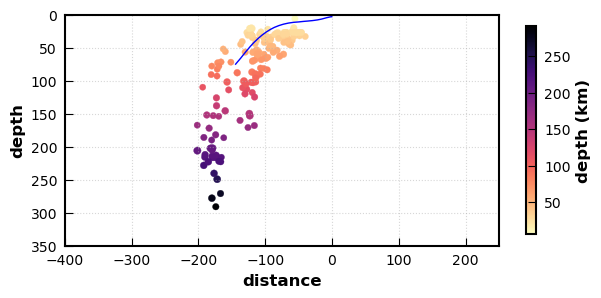

In [66]:
# plot cross-section along slected profile

db1_source1 = db1_s1[dist_prof1 < 80000.0]

xs1,ys1 = pyproj.transform(lla, myproj,db1_source1['lon'],db1_source1['lat'], radians=False)

# shifted data to origin ()
ddrot = 40.0/180*np.pi

xdist1 = (xs1-2.0e6)* np.cos(ddrot)


fig,ax1 = plt.subplots(ncols=1,nrows=1,figsize=(7,3.))

clb = ax1.scatter(xdist1/1e3,db1_source1['depth'],c=db1_source1['depth'],s=db1_source1['mag']*5,cmap='magma_r',label='event')

fig.colorbar(clb,ax=ax1,label='depth (km)',shrink=0.9)

plt.plot((slabcross['Points:0']-2.0e6)* np.cos(ddrot)/1e3,-slabcross['Points:2']/1e3,'-',c='b',linewidth=1.)

xmin, xmax, ymin,ymax =  172, 179,-43, -34

ax1.set_xlim([-400, 250])
ax1.set_ylim([0, 350])

ax1.invert_yaxis()
ax1.set_xlabel('distance')
ax1.set_ylabel('depth')

plt.savefig('db1-slab-cross-select2.png')

In [253]:
# print(db1_source1['depth'],db1_source1['dip'])
# db1_source1.to_csv('event-inter-prof1.csv')

# print(np.cos(ddrot),np.sin(ddrot))

In [51]:
csvfile3 = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/quality/ground_motion_im_table_rotd50_flat.csv'
db3 = pd.read_csv(csvfile3)

# select stations in backarc and forearc
# require the polygon of TVZ region defined by Lee and Bora.

tvzfile = '/Users/DuoL/Documents/NSHM/Attenuation/tectoniczone/tvz_back_def.csv'
tvztable37 = pd.read_csv(tvzfile)

forefile = '/Users/DuoL/Documents/NSHM/Attenuation/tectoniczone/def_forearc_v4.csv'
foretable = pd.read_csv(forefile)


/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_11126/617623996.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  db3 = pd.read_csv(csvfile3)


#### Step 1.2. Select TVZ and forearc sites and events 

In [53]:
# both HN and BN
print(db3['tect_class'].unique())

# select events
# xmin,xmax, ymin, ymax = 173, 178,-41, -37

# db3_s2 = db3_s1[ db3_s1['tect_class']=='Slab']

# # db3_s2 : selected slab events in north Island
# print(db3_s2['mag'].min(), db3_s2['mag'].max())


# select sites in TVZ backarc

from GMfunc.functions_polygon import point_to_polygon_distance_vectorized       

dist_tvz37 = point_to_polygon_distance_vectorized(db3[['sta_lon','sta_lat']].values, tvztable37[['longitude','latitude']].values)

print('distances to tVZ:',dist_tvz.min(), dist_tvz.max()  )

dist_fore = point_to_polygon_distance_vectorized(db3[['sta_lon','sta_lat']].values, foretable[['longitude','latitude']].values) 

print('distance to forearc:',dist_fore.min(), dist_fore.max()  )




['Crustal' 'Slab' 'Interface' 'Undetermined' 'Outer-rise']
distances to tVZ: 0.0 10.764016889912794
distance to forearc: 0.0 6.829540800354951


In [54]:

# forarc and inslab events
db3['dist_tvz37'] = dist_tvz37
db3['dist_fore'] = dist_fore

db3_select = db3[db3['mag_type']=='Mw']

db3_s1fore = db3_select[db3_select['dist_fore']<=0.01]

db3_s5a = db3_s1fore[db3_s1fore['tect_class']=='Slab']
db3_s6a = db3_s1fore[db3_s1fore['tect_class']=='Interface']

db3_s1 = db3_select[db3_select['dist_tvz37']<0.01]

db3_s5 = db3_s1[db3_s1['tect_class']=='Slab']
db3_s6 = db3_s1[db3_s1['tect_class']=='Interface']

print('records in forearc:',db3_s5a.__len__())
print('records in backarc:',db3_s5.__len__())

records in forearc: 10688
records in backarc: 1009


In [59]:
print(db3_s5a['Z2.5'].describe())

count    10688.000000
mean         1.584197
std          2.475982
min          0.075000
25%          0.325000
50%          0.325000
75%          1.475000
max         10.475000
Name: Z2.5, dtype: float64


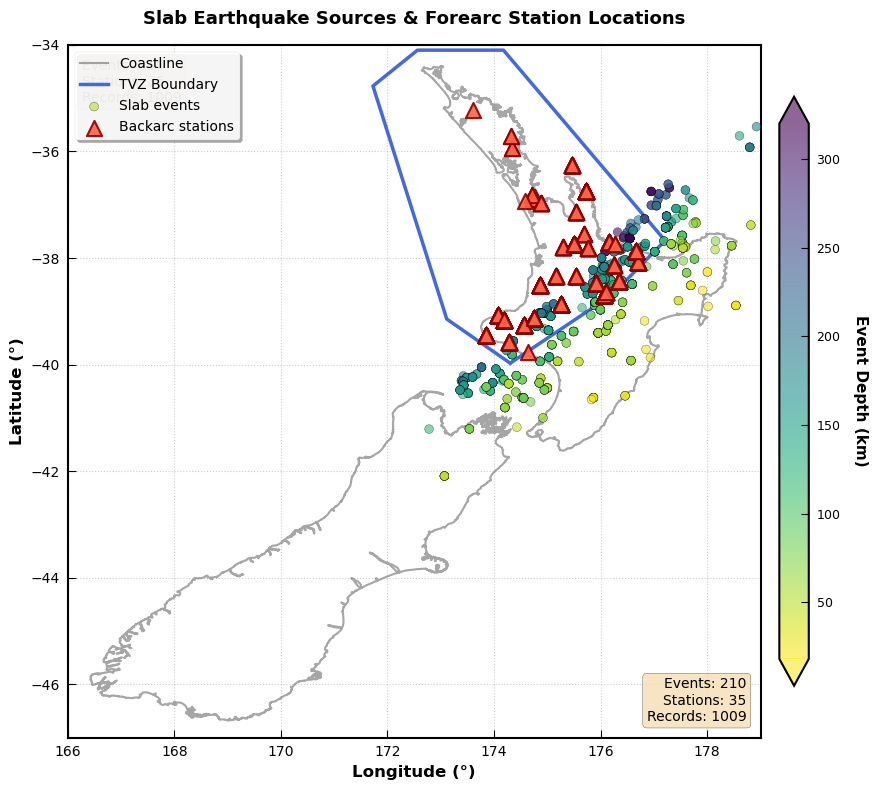

In [67]:
# how many sites are in TVZ backarc
xmin, xmax, ymin, ymax = 166, 179, -47, -34

# Create enhanced map
fig, ax = plt.subplots(figsize=(10, 8))

# Plot coastline
ax.plot(coast[0,:], coast[1,:], '-', c='gray', linewidth=1.5, alpha=0.7, 
        label='Coastline', zorder=1)

# Plot tectonic boundaries
ax.plot(tvztable37['longitude'], tvztable37['latitude'], '-', c='royalblue', 
        linewidth=2.5, label='TVZ Boundary', zorder=2)
# ax.plot(foretable['longitude'], foretable['latitude'], '-', c='purple', 
#         linewidth=2.5, label='Forearc Boundary', zorder=2)

# Plot earthquake events (colored by depth)
scatter = ax.scatter(db3_s5['ev_lon'], db3_s5['ev_lat'], 
                     c=db3_s5['ev_depth'], cmap='viridis_r', 
                     s=40, alpha=0.6, edgecolors='black', linewidth=0.3,
                     label='Slab events', zorder=3)

# Plot station locations
ax.scatter(db3_s5['sta_lon'], db3_s5['sta_lat'], 
           marker='^', s=120, c='tomato', edgecolors='darkred', 
           linewidth=1.5, label='Backarc stations', 
           zorder=4, alpha=0.9)

# Colorbar for event depth
cbar = plt.colorbar(scatter, ax=ax, shrink=0.85, pad=0.02, extend='both')
cbar.set_label('Event Depth (km)', fontsize=11, fontweight='bold', rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=9)

# Set map extent
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# Labels and title
ax.set_xlabel('Longitude (°)', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude (°)', fontsize=12, fontweight='bold')
ax.set_title('Slab Earthquake Sources & Forearc Station Locations', 
             fontsize=13, fontweight='bold', pad=15)

# Legend
ax.legend(loc='upper left', frameon=True, shadow=True, fontsize=10, 
          fancybox=True, framealpha=0.9)

# Grid
ax.grid(True, linestyle=':', alpha=0.4, color='gray')
ax.tick_params(axis='both', which='major', labelsize=10)

# Add map information
n_events = len(db3_s5['evid'].unique())
n_stations = len(db3_s5['sta'].unique())
n_records = len(db3_s5)

# Add text box with statistics
textstr = f'Events: {n_events}\nStations: {n_stations}\nRecords: {n_records}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', bbox=props)

# Equal aspect ratio for geographic accuracy
ax.set_aspect('equal', adjustable='box')


# Add statistics text box
n_events = len(db3_s5['evid'].unique())
n_stations = len(db3_s5['sta'].unique())
n_records = len(db3_s5)
textstr = f'Events: {n_events}\nStations: {n_stations}\nRecords: {n_records}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left', bbox=props, zorder=5)


plt.tight_layout()
plt.savefig('TVZ-sites-slab-back37.png', dpi=300, bbox_inches='tight')
plt.show()


7.8 3.7
68.3962286165603 2.482211757922822 18.24524757715781
69.0 4.0 19.0


/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_11126/2694335050.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


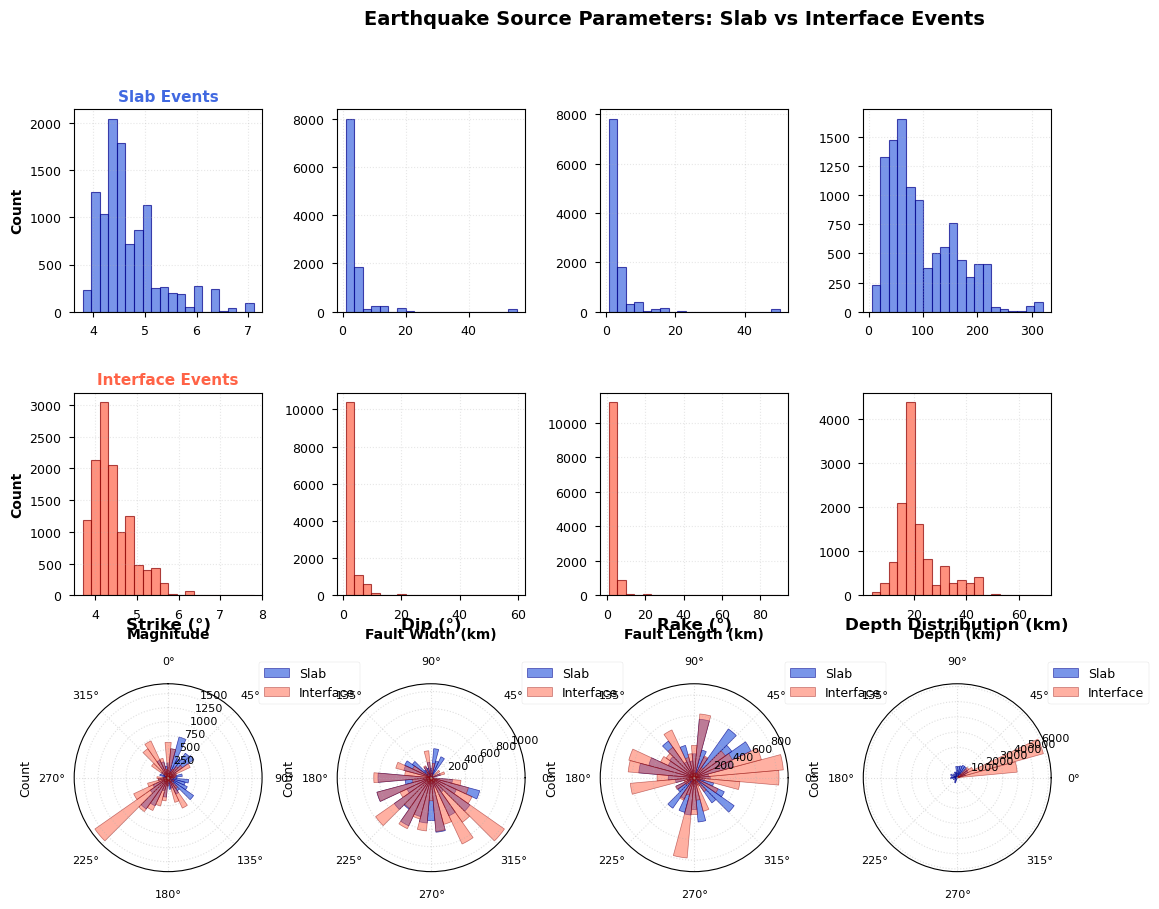

In [ ]:
# check event sources of slab at backarc sites (db3_s5) and forearc site (db3_s5a)

print(db3_s6a['mag'].max(), db3_s6a['mag'].min())
print(db3_s6a['z_tor'].max(), db3_s6a['z_tor'].min(), db3_s6a['z_tor'].median())
print(db3_s6a['ev_depth'].max(), db3_s6a['ev_depth'].min(), db3_s6a['ev_depth'].median())

# Create comprehensive figure with regular histograms and polar plots
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 5, hspace=0.4, wspace=0.4)

# Row 1 - Slab events (regular histograms)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

ax1.hist(db3_s5a['mag'], bins=20, color='royalblue', alpha=0.7, edgecolor='darkblue', linewidth=0.8)
ax2.hist(db3_s5a['f_width'], bins=20, color='royalblue', alpha=0.7, edgecolor='darkblue', linewidth=0.8)
ax3.hist(db3_s5a['f_length'], bins=20, color='royalblue', alpha=0.7, edgecolor='darkblue', linewidth=0.8)
ax4.hist(db3_s5a['ev_depth'], bins=20, color='royalblue', alpha=0.7, edgecolor='darkblue', linewidth=0.8)

ax1.set_title('Slab Events', fontweight='bold', fontsize=11, color='royalblue')
ax1.set_ylabel('Count', fontweight='bold', fontsize=10)

# Row 2 - Interface events (regular histograms)
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])

ax5.hist(db3_s6a['mag'], bins=20, color='tomato', alpha=0.7, edgecolor='darkred', linewidth=0.8)
ax6.hist(db3_s6a['f_width'], bins=20, color='tomato', alpha=0.7, edgecolor='darkred', linewidth=0.8)
ax7.hist(db3_s6a['f_length'], bins=20, color='tomato', alpha=0.7, edgecolor='darkred', linewidth=0.8)
ax8.hist(db3_s6a['ev_depth'], bins=20, color='tomato', alpha=0.7, edgecolor='darkred', linewidth=0.8)

ax5.set_title('Interface Events', fontweight='bold', fontsize=11, color='tomato')
ax5.set_xlabel('Magnitude', fontweight='bold', fontsize=10)
ax6.set_xlabel('Fault Width (km)', fontweight='bold', fontsize=10)
ax7.set_xlabel('Fault Length (km)', fontweight='bold', fontsize=10)
ax8.set_xlabel('Depth (km)', fontweight='bold', fontsize=10)
ax5.set_ylabel('Count', fontweight='bold', fontsize=10)

# Style regular histograms
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.grid(True, alpha=0.3, linestyle=':')
    ax.tick_params(labelsize=9)

# Row 3 - Polar plots for Strike, Dip, and Rake
params_to_plot = [('strike', 'Strike (°)', 0), ('dip', 'Dip (°)', 1), ('rake', 'Rake (°)', 2)]

for param_name, param_label, col_idx in params_to_plot:
    if param_name in db3_s5a.columns and param_name in db3_s6a.columns:
        ax_polar = fig.add_subplot(gs[2, col_idx], projection='polar')
        
        # Get data and convert to radians
        data_slab = db3_s5a[param_name].dropna()
        data_interface = db3_s6a[param_name].dropna()
        
        # For strike: 0-360°, use as is
        # For dip: 0-90°, map to full circle for visualization
        # For rake: -180 to 180°, convert to 0-360°
        if param_name == 'rake':
            data_slab = np.where(data_slab < 0, data_slab + 360, data_slab)
            data_interface = np.where(data_interface < 0, data_interface + 360, data_interface)
        elif param_name == 'dip':
            # Scale dip (0-90) to (0-360) for full circle representation
            data_slab = data_slab * 4
            data_interface = data_interface * 4
        
        data_slab_rad = np.radians(data_slab)
        data_interface_rad = np.radians(data_interface)
        
        # Create rose diagram with appropriate bins
        n_bins = 36  # 10-degree bins
        bins_polar = np.linspace(0, 2*np.pi, n_bins + 1)
        
        hist_slab, _ = np.histogram(data_slab_rad, bins=bins_polar)
        hist_interface, _ = np.histogram(data_interface_rad, bins=bins_polar)
        
        width = 2 * np.pi / n_bins
        theta = bins_polar[:-1]
        
        # Plot bars
        bars1 = ax_polar.bar(theta, hist_slab, width=width, bottom=0, 
                           alpha=0.7, color='royalblue', label='Slab', 
                           edgecolor='darkblue', linewidth=0.5)
        bars2 = ax_polar.bar(theta, hist_interface, width=width, bottom=0,
                           alpha=0.5, color='tomato', label='Interface', 
                           edgecolor='darkred', linewidth=0.5)
        
        # Set orientation (North=0 for strike, standard for others)
        if param_name == 'strike':
            ax_polar.set_theta_zero_location('N')
            ax_polar.set_theta_direction(-1)  # Clockwise
        else:
            ax_polar.set_theta_zero_location('E')
        
        ax_polar.set_title(param_label, fontweight='bold', fontsize=12, pad=20)
        ax_polar.legend(loc='upper left', bbox_to_anchor=(0.95, 1.15), fontsize=9, frameon=True)
        ax_polar.grid(True, alpha=0.4, linestyle=':')
        ax_polar.tick_params(labelsize=8)
        
        # Add radial label
        ax_polar.set_ylabel('Count', fontsize=9, labelpad=30)

# Add depth polar plot in the 4th column of row 3
ax_depth_polar = fig.add_subplot(gs[2, 3], projection='polar')

# Create depth distribution in polar coordinates
depth_slab = db3_s5a['ev_depth'].dropna()
depth_interface = db3_s6a['ev_depth'].dropna()

# Map depth to angles (0-360 degrees based on depth ranges)
# Use depth bins to create angular distribution
depth_bins = np.linspace(0, max(depth_slab.max(), depth_interface.max()), 37)
hist_depth_slab, _ = np.histogram(depth_slab, bins=depth_bins)
hist_depth_interface, _ = np.histogram(depth_interface, bins=depth_bins)

# Convert to polar coordinates
theta_depth = np.linspace(0, 2*np.pi, len(hist_depth_slab))
width_depth = 2 * np.pi / len(hist_depth_slab)

ax_depth_polar.bar(theta_depth, hist_depth_slab, width=width_depth, bottom=0,
                   alpha=0.7, color='royalblue', label='Slab', 
                   edgecolor='darkblue', linewidth=0.5)
ax_depth_polar.bar(theta_depth, hist_depth_interface, width=width_depth, bottom=0,
                   alpha=0.5, color='tomato', label='Interface',
                   edgecolor='darkred', linewidth=0.5)

ax_depth_polar.set_title('Depth Distribution (km)', fontweight='bold', fontsize=12, pad=20)
ax_depth_polar.legend(loc='upper left', bbox_to_anchor=(0.95, 1.15), fontsize=9, frameon=True)
ax_depth_polar.grid(True, alpha=0.4, linestyle=':')
ax_depth_polar.set_ylabel('Count', fontsize=9, labelpad=30)

plt.suptitle('Earthquake Source Parameters: Slab vs Interface Events', 
             fontsize=14, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('event_source_comparison_azimuthal.png', dpi=300, bbox_inches='tight')
plt.show()
xs
# db3_s5.to_csv('gmdb3-slab-backarc.csv', index=False)


#### Step 1.3. Common events recorded at both forearc and backarc sites

In [46]:
sitefile = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/quality/site_table.csv'
siteTable = pd.read_csv(sitefile)
print(siteTable.keys())

# select subset from siteTable
subse_fore = siteTable.loc[siteTable['sta'].isin(db3_s5a['sta'].unique()), ['sta', 'Vs30','Q_Vs30']]
print(subse_fore.__len__())

subse_back = siteTable.loc[siteTable['sta'].isin(db3_s5['sta'].unique()), ['sta', 'Vs30','Q_Vs30']]
print(subse_back.__len__())

# slab events selected in forearc and backarc

sub_db3_s5a = db3_s5a.loc[db3_s5a['evid'].isin(db3_s5['evid'].unique()),['evid','ev_lat','Vs30','ev_lon','ev_depth','mag','r_rup','r_hyp','sta','PGA','pSA_1.0','pSA_3.0']]
sub_db3_s5 = db3_s5.loc[db3_s5['evid'].isin(sub_db3_s5a['evid'].unique()),['evid','Vs30','r_rup','mag','r_hyp','sta','PGA','pSA_1.0','pSA_3.0']]

db3_s5a.to_csv('all_forearc_pga_vs30.csv')
db3_s5.to_csv('all_backarc_pga_vs30.csv')

mask1 = db3_s5a['Vs30'].between(100,1200,inclusive='both')
sub_db4_s5a = db3_s5a.loc[mask1].copy()

mask1 = db3_s5['Vs30'].between(100,1200,inclusive='both')
sub_db4_s5 = db3_s5.loc[mask1].copy()

print('records in forearc:',db3_s5a.__len__())
print('records in backarc:',db3_s5.__len__())

print('events in both:',sub_db3_s5['evid'].unique().__len__(),sub_db3_s5a['evid'].unique().__len__())

print('events in forearc:',db3_s5a['sta'].unique().__len__())
print('events in backarc:',db3_s5['sta'].unique().__len__())

print('sites in forearc:',sub_db4_s5a['sta'].unique().__len__())
print('sites in backarc:',sub_db4_s5['sta'].unique().__len__())


print('channel:',db3_s5a['chan'].unique())

print('Vs30 ranges: ',subse_fore['Vs30'].mean(),subse_fore['Vs30'].min(),subse_fore['Vs30'].max())
print('Vs30 ranges: ',subse_back['Vs30'].mean(),subse_back['Vs30'].min(),subse_back['Vs30'].max())


Index(['net', 'sta', 'lat', 'lon', 'elev', 'site_class', 'Vs30', 'Vs30_std',
       'Q_Vs30', 'Vs30_Ref', 'T0', 'T0_std', 'Q_T0', 'D_T0', 'T0_ref', 'Z1.0',
       'Z1.0_std', 'Q_Z1.0', 'Z1.0_ref', 'Z2.5', 'Z2.5_std', 'Q_Z2.5',
       'Z2.5_ref', 'site_domain_no', 'basin'],
      dtype='object')
188
23
records in forearc: 10688
records in backarc: 457
events in both: 156 156
events in forearc: 188
events in backarc: 23
sites in forearc: 188
sites in backarc: 23
channel: ['HN' 'BN']
Vs30 ranges:  475.4574468085106 120 1000
Vs30 ranges:  585.8695652173913 182 1000


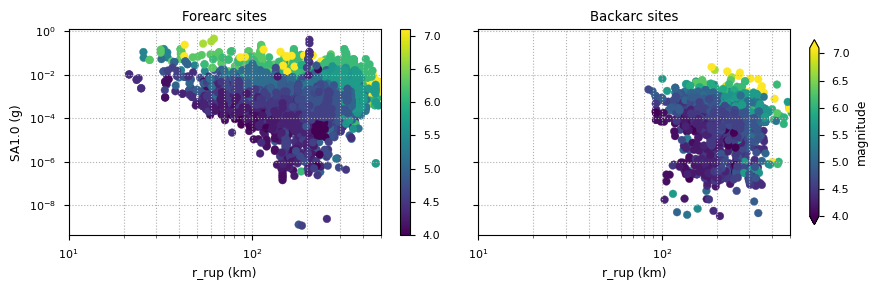

In [37]:
# s5 is selected for TVZ stations (db3_s5) or forearc stations (db3_s5a)

# db3_s5b = db3_s5a[(db3_s5a['mag']>3.8) & (db3_s5a['mag']<7.8)]

fig,ax0 = plt.subplots(1,2,figsize=(9,3),sharey=True,sharex=True)


fig2 = ax0[0].scatter(sub_db3_s5a['r_rup'],sub_db3_s5a['pSA_1.0'],c=sub_db3_s5a['mag'],cmap='viridis',marker='o',label='data')

ax0[0].set_title('Forearc sites')
ax0[0].set_xscale('log')
ax0[0].set_yscale('log')

ax0[0].set_xlabel('r_rup (km)')
ax0[0].set_ylabel('SA1.0 (g)')
ax0[0].set_xlim([10,500])
ax0[0].grid(which='both',linestyle=':')
fig.colorbar(fig2,ax=ax0[0])


fig1 = ax0[1].scatter(sub_db3_s5['r_rup'],sub_db3_s5['pSA_1.0'],c=sub_db3_s5['mag'],cmap='viridis',marker='o',label='data')

ax0[1].set_title('Backarc sites')
ax0[1].set_xscale('log')
ax0[1].set_yscale('log')

ax0[1].set_xlabel('r_rup (km)')
ax0[1].set_xlim([10,500])
ax0[1].grid(which='both',linestyle=':')

clb = fig.colorbar(fig1,ax=ax0[1],shrink=0.9,extend='both')
clb.set_label('magnitude')

plt.tight_layout()
plt.savefig('sa3-event-site.png')

#### Step 1.4 Plot GMM models and data, comparing variation.

/Users/DuoL/Documents/NSHM/Attenuation/ag20_forearc/ag20_inter_pga_Mw4.0.csv


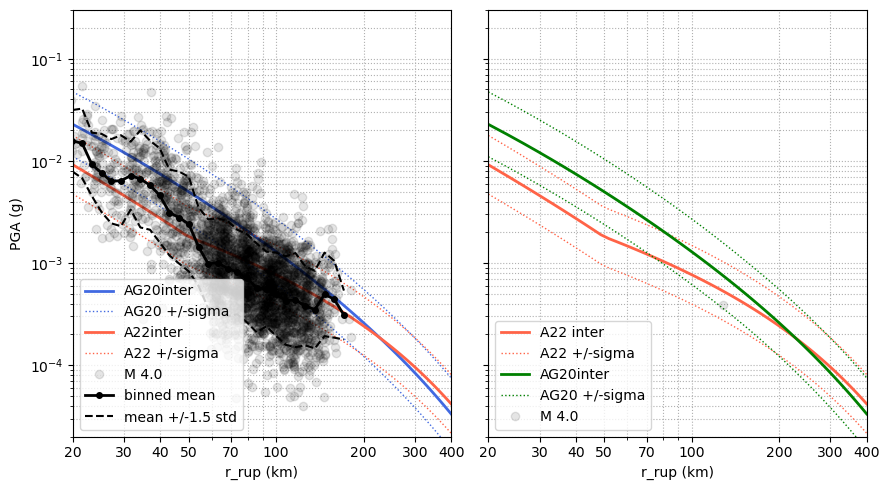

In [130]:
# check difference between R_rup and R_hypo

# fig = plt.figure(figsize=(5,4))
# plt.plot(db3_s5b['r_hyp'],db3_s5b['r_rup'],'.r',label='data')
# plt.plot([20,500],[20,500],'--k',label='1:1')

# plt.xlabel('R_hypo (km)')
# plt.ylabel('R_rup (km)')
# plt.legend()

# plt.savefig('rrup-rhypo.png')

# importlib.reload(GMfunc.plot_pga_gmpe)
from GMfunc.plot_pga_gmpe import bin_mean_std,bin_mean_err


model_tag = 'inter'
arcflag = 'forearc'
imt = 'pga' # or pga or sa3

target_mag= 4.0
nbins = 40

# select magnitude from the sub tables
# mask1 = sub_db4_s5a['mag'].between(target_mag-0.2, target_mag+0.2,inclusive='both')
# sub_m5 = sub_db4_s5a.loc[mask1].copy()

mask1 = sub_db3_s6a['mag'].between(target_mag-0.25, target_mag+0.25,inclusive='both')
sub_m5 = sub_db3_s6a.loc[mask1].copy()

fig,axes1= plt.subplots(1,2,figsize=(9,5),sharey=True,sharex=True)

gmpefile1 = '/Users/DuoL/Documents/NSHM/Attenuation/ag20_'+ arcflag + '/ag20_'+model_tag+'_'+imt+'_Mw'+str(np.round(target_mag,1))+'.csv'
db4_abr = pd.read_csv(gmpefile1)

axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']),'-',c='royalblue',lw=2,label='AG20'+model_tag  )
axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']+db4_abr['sigma_tot']),':',c='royalblue',lw=1 ,label='AG20 +/-sigma' )
axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']-db4_abr['sigma_tot']),':',c='royalblue',lw=1  )

gmpefile1 = '/Users/DuoL/Documents/NSHM/Attenuation/atk22_'+ arcflag + '/atk22_'+ model_tag +'_'+imt+'_Mw'+str(np.round(target_mag,1))+'.csv'
db4_abr = pd.read_csv(gmpefile1)


axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']),'-',c='tomato',lw=2,label='A22'+model_tag  )
axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']+db4_abr['sigma_tot']),':',c='tomato',lw=1 ,label='A22 +/-sigma' )
axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']-db4_abr['sigma_tot']),':',c='tomato',lw=1  )

axes1[0].plot(sub_m5['r_rup'],sub_m5['PGA'],'ok',alpha=0.1,label='M '+str(target_mag))

mean_bin,std_bins,rhypo_bins = bin_mean_std(nbins,sub_m5['PGA'].values , sub_m5['r_rup'].values)  

axes1[0].plot(rhypo_bins[0:-1], 10**mean_bin,'o-',c='k',label='binned mean',lw=2,ms=4)
axes1[0].plot(rhypo_bins[0:-1], 10**(mean_bin - 1.28*std_bins),'--',c='k',markersize=0.7,label='mean +/-1.5 std')
axes1[0].plot(rhypo_bins[0:-1], 10**(mean_bin + 1.28*std_bins),'--',c='k',markersize=0.7)


axes1[0].set_xscale("log")
axes1[0].set_yscale("log")
axes1[0].set_xlim([20,400])

axes1[0].legend(loc=3)
axes1[0].set_ylim([2e-5,0.3])
axes1[0].set_xlabel('r_rup (km)')
axes1[0].set_ylabel('PGA (g)')
axes1[0].grid(which='both',linestyle=':')

axes1[0].set_xticks([20,30,40,50,70,100,200,300,400])

axeslabels=['20','30','40','50','70','100','200','300','400']
axes1[0].set_xticklabels(axeslabels)

## the same for backarc data

arcflag = 'backarc'

mask1 = sub_db3_s6['mag'].between(target_mag-0.25, target_mag+0.25,inclusive='both')
sub_m5 = sub_db3_s6.loc[mask1].copy()

gmpefile1 = '/Users/DuoL/Documents/NSHM/Attenuation/atk22_'+ arcflag + '/atk22_'+ model_tag +'_'+imt+'_Mw'+str(np.round(target_mag,1))+'.csv'
db4_abr = pd.read_csv(gmpefile1)

axes1[1].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']),'-',c='tomato',lw=2,label='A22 '+model_tag  )
axes1[1].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']+db4_abr['sigma_tot']),':',c='tomato',lw=1 ,label='A22 +/-sigma' )
axes1[1].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']-db4_abr['sigma_tot']),':',c='tomato',lw=1  )


gmpefile1 = '/Users/DuoL/Documents/NSHM/Attenuation/ag20_'+ 'forearc' + '/ag20_'+model_tag+'_'+imt+'_Mw'+str(np.round(target_mag,1))+'.csv'
db4_abr = pd.read_csv(gmpefile1)
print(gmpefile1)

axes1[1].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']),'-',c='green',lw=2,label='AG20'+model_tag  )
axes1[1].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']+db4_abr['sigma_tot']),':',c='green',lw=1 ,label='AG20 +/-sigma' )
axes1[1].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']-db4_abr['sigma_tot']),':',c='green',lw=1  )


axes1[1].plot(sub_m5['r_rup'],sub_m5['PGA'],'ok',alpha=0.1,label='M '+str(target_mag))

mean_bin,std_bins,rhypo_bins = bin_mean_std(nbins,sub_m5['PGA'].values , sub_m5['r_rup'].values)  

# axes1[1].plot(rhypo_bins[0:-1], 10**mean_bin,'o-',c='k',label='binned mean',lw=2,ms=4)
# axes1[1].plot(rhypo_bins[0:-1], 10**(mean_bin - 1.28*std_bins),'--',c='k',markersize=0.7,label='mean +/-1.5 std')
# axes1[1].plot(rhypo_bins[0:-1], 10**(mean_bin + 1.28*std_bins),'--',c='k',markersize=0.7)



axes1[1].set_xscale("log")
axes1[1].set_yscale("log")
# axes1[1].set_xlim([20,400])
# axes1[1].set_ylim([2e-5,0.3])
axes1[1].set_xlabel('r_rup (km)')
axes1[1].grid(which='both',linestyle=':')
axes1[1].set_xticks([20,30,40,50,70,100,200,300,400])

axeslabels=['20','30','40','50','70','100','200','300','400']
axes1[1].set_xticklabels(axeslabels)

axes1[1].legend(loc=3)

plt.tight_layout()
plt.savefig('pga-mw'+str(target_mag)+'-'+model_tag+'.png')
plt.show()

In [ ]:
# sub_m5['chan'].unique()

### Step 2.  Prepare data for Residual analysis

In [485]:
# Example prediction/observation dataframes
from GMfunc.plot_pga_gmpe_v2 import plot_pga_gmpe_vs_observed

#example

backarc_flag = True

if backarc_flag:
    arcflag = 'backarc'
else:
    arcflag = 'forearc'


# parameters in GMPE

mag = 6.5
hypo_depth = 50.0

print(arcflag)

# compare two gmpes for magnitude <-5, usng r_hypo
# Note: BChypo uses r_hyp but the output column is labeled as 'rrup_km'

# gmpefile1 = '/Users/DuoL/Documents/NSHM/Attenuation/ag20_'+ arcflag + '/ag20_slab_pga_Mw'+str(mag)+'.csv'
# db4_a20 = pd.read_csv(gmpefile1)

gmpefile2 = '/Users/DuoL/Documents/NSHM/Attenuation/atk22_'+ arcflag +'/atk22_slab_pga_Mw' + str(mag)+'.csv'
db4 = pd.read_csv(gmpefile2)


print(db4.keys())

db3_s6 = db3_s5[db3_s5['mag']< mag + 0.25]
db3_s4 = db3_s6[db3_s6['mag']> mag - 0.25]

pred= pd.DataFrame({
    "distance_km": db4['rrup_km'],
    "mean_ln": db4['mean_ln'],  # ln(PGA in g)
    "sigma_tot": db4['sigma_tot']
})

obs = pd.DataFrame({

    "distance_km": db3_s4['r_rup'], # if atk22, r_rup is used, while bc hydro uses r_hypo
        # "distance_km": db3_s4['r_hyp'], --- IGNORE    

    "pga": db3_s4['PGA'],
    "event_id": db3_s4['evid'],
    "site": db3_s4['sta']
})

print(pred.keys(),obs.keys())



backarc
Index(['rrup_km', 'mean_ln', 'sigma_tot'], dtype='object')
Index(['distance_km', 'mean_ln', 'sigma_tot'], dtype='object') Index(['distance_km', 'pga', 'event_id', 'site'], dtype='object')


In [ ]:
# calculate RuptureDistance; step 1, test,

# from  GMfunc.distance_calculator import RuptureDistanceCalculator

# mag = 5
# hypo_depth=20.0
# ztor = 0.0 
# dip = 45.0

# rx = np.linspace(1.0,20.0,100)

# gm_dist = RuptureDistanceCalculator(magnitude=mag,ztor=ztor,dip=dip,hypo_depth=hypo_depth)

# print('width of the fault from scaling relation:',gm_dist._calculate_width())

# rjb, rrup = gm_dist.get_rjb_rrup(rx)

# print('practical and theoretic difference:',gm_dist._calculate_width()/np.sqrt(2),-rrup[-1]+rx[-1])

width of the fault: 3.1622776601683795
practical and theoretic difference: 2.23606797749979 2.23606797749979


In [ ]:
# calculate RuptureDistance; step 2, 
# from  GMfunc.distance_calculator import RuptureDistanceCalculator

# hypo_depth=50.0
# ztor = 48
# dip = 58.0

# # for test calcullate distance

# gm_dist = RuptureDistanceCalculator(magnitude=mag,ztor=ztor,dip=dip)

# print('width of the fault:',gm_dist._calculate_width())
# faultW = gm_dist._calculate_width()

# # rhypo from BChydro dataset; key step is to calcualte r_x

# rx = np.sqrt(db4_abr['rhyp_km']**2 - hypo_depth**2) - faultW *0.5 * np.cos(dip/180*np.pi)

# rjb,rrup = gm_dist.get_rjb_rrup(rx)

# plt.figure()
# plt.plot(db4_abr['rhyp_km'],rrup,'-^r',label='calculated')
# plt.plot(rx,rx,'-k',label='1:1')
# plt.xlabel('r_hyp')
# plt.ylabel('r_rup')
# plt.legend()
# # plt.xlim([0,150])
# # plt.ylim([0,150])
# plt.show()

#### Step1.5. Figures for comparison and residual

backarc


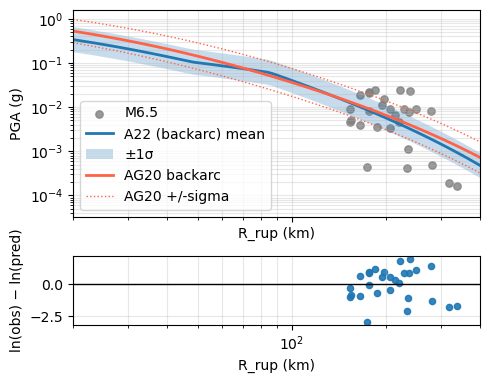

In [486]:
# plot ATK22 and ABR15 with GM data in the same plot.

fig, axes1 = plot_pga_gmpe_vs_observed(
    pred, obs,
    distance_col="distance_km",
    mean_ln_col="mean_ln",
    sigma_col="sigma_tot",
    obs_im_col="pga",
    obs_unit="g",
    distance_type_label="R_rup",
    label_pred="A22 (backarc) mean",
    label_obs="M" + str(mag),
    show_residuals=True,
    figsize=(5, 4)
)

plt.xlim([20, 400])

# plot gmpe in addition to binned mean
axes1[0].legend().remove()

# BChydro or ABR2015 model, assuming hypo_depth=50 km
# axes1[0].plot(rrup, np.exp(db4_abr['mean_ln']),'-',c='tomato',lw=2,label='BChydro forearc'  )
# axes1[0].plot(rrup, np.exp(db4_abr['mean_ln']+db4_abr['sigma_tot']),':',c='tomato',lw=1 ,label='BChydro +/-sigma' )
# axes1[0].plot(rrup, np.exp(db4_abr['mean_ln']-db4_abr['sigma_tot']),':',c='tomato',lw=1  )

gmpefile1 = '/Users/DuoL/Documents/NSHM/Attenuation/ag20_'+ arcflag + '/ag20_slab_pga_Mw'+str(int(mag))+'.csv'
db4_abr = pd.read_csv(gmpefile1)
print(arcflag)

axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']),'-',c='tomato',lw=2,label='AG20 backarc'  )
axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']+db4_abr['sigma_tot']),':',c='tomato',lw=1 ,label='AG20 +/-sigma' )
axes1[0].plot(db4_abr['rrup_km'], np.exp(db4_abr['mean_ln']-db4_abr['sigma_tot']),':',c='tomato',lw=1  )

# gmpefile3 = '/Users/DuoL/Documents/NSHM/Attenuation/atk22_'+ 'forearc' +'/atk22_slab_pga_Mw' + str(mag)+'.csv'
# db4_atk = pd.read_csv(gmpefile3)

axes1[0].legend(loc=3)

plt.savefig('pga-mw'+str(mag)+'-fore-back-ag20.png')

In [73]:
# Generate residual table

mag = 6.5

backarc_flag = False
model = 'atk22_resd'


if backarc_flag:
    arcflag = 'backarc'
else:
    arcflag = 'forearc'

print(arcflag)

gmpefile2 = '/Users/DuoL/Documents/NSHM/Attenuation/atk22_'+ arcflag +'/atk22_slab_pga_Mw' + str(mag)+'.csv'
db4 = pd.read_csv(gmpefile2)

print(db4.keys())

# db3_s5a is forearc while db3_s5 is backarc; output, db3_s4 for selected magnitude
if backarc_flag:
    db3_s6 = db3_s5[db3_s5['mag']< mag + 0.25]
    db3_s4 = db3_s6[db3_s6['mag']> mag - 0.25]
else:
    db3_s6 = db3_s5a[db3_s5a['mag']< mag + 0.25]
    db3_s4 = db3_s6a[db3_s6a['mag']> mag - 0.25]

db4_dist = []
db4_mean = []
db4_evid = []
db4_staid = []
db4_sigma = []

for ik, rrup in enumerate(db3_s4['r_rup']):

    id_db4 = np.abs(db4['rrup_km']-rrup).idxmin()
    db4_dist.append(rrup)
    db4_mean.append(db4['mean_ln'][id_db4])
    db4_evid.append(db3_s4['evid'].values[ik])
    db4_staid.append(db3_s4['sta'].values[ik])
    db4_sigma.append(db4['sigma_tot'][id_db4])

obs_df = pd.DataFrame({
    "distance_km": db3_s4['r_rup'], # if atk22, r_rup is used, while bc hydro uses r_hypo
    "pga": db3_s4['PGA'],
    "event_id": db3_s4['evid'],
    'magnitude': db3_s4['mag'],
    "site_id": db3_s4['sta']
})

pred_df= pd.DataFrame({
    "distance_km": db4_dist,
    "mean_ln": db4_mean,  # ln(PGA in g)
    # "event_id": db4_evid,
    # "site_id": db4_staid,
    "sigma_tot": db4_sigma
})


obs_df.to_csv(model + '/obs_df_m'+str(mag)+ '_' + arcflag + '.csv')
pred_df.to_csv(model + '/pred_df_m'+str(mag)+'_' + arcflag + '.csv')

print('mag:',mag)

forearc
Index(['rrup_km', 'mean_ln', 'sigma_tot'], dtype='object')
mag: 6.5


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Load your tables ---
# select what model (atk22 or bchydro) or forearc/backarc

# mag = 5
# model = 'bchydro_resd'

obs = pd.read_csv(model + '/'+ 'obs_df_m'+ str(mag)+'_' + arcflag +'.csv')  # columns: distance_km, pga, event_id, site_id
pred = pd.read_csv(model + '/'+ 'pred_df_m'+ str(mag)+'_' + arcflag +'.csv')                # REQUIRED cols: event_id, site_id, distance_km, mean_ln; optional: sigma_tot

print('mag:',mag)

# --- 2) Merge and compute residuals: r = ln(obs_g) - mean_ln ---
def to_g(series, unit="g"):
    u = unit.lower()
    if u == "g": return series.astype(float)
    if u in ("m/s^2","mps2","m s^-2"): return series.astype(float)/9.80665
    if u in ("cm/s^2","cmps2","gal"):  return series.astype(float)/981.0
    raise ValueError("obs_unit must be 'g', 'm/s^2', or 'cm/s^2'.")

df = pd.merge(obs, pred, on=["distance_km"], how="inner", suffixes=("_obs","_pred"))
df["ln_obs_g"] = np.log(to_g(df["pga"], "g"))

df["resid"]  = df["ln_obs_g"] - df["mean_ln"]   # natural-log residual

print(df['resid'].mean())

# Harmonize distance column once:
if "distance_km_pred" in df.columns:
    df["distance_km"] = df["distance_km_pred"]
elif "distance_km_obs" in df.columns:
    df["distance_km"] = df["distance_km_obs"]
elif "distance_km" in df.columns:
    pass
else:
    # last resort: look for common alternatives
    for cand in ["rrup","rjb","rx","rhypo","rrup_km","rjb_km","rx_km","rhypo_km"]:
        if cand in df.columns:
            df["distance_km"] = df[cand].astype(float)
            break
    else:
        raise KeyError("No distance column found after merge.")


df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["distance_km","ln_obs_g","mean_ln","resid"])


# Export residuals
df[["event_id","site_id",'magnitude',"distance_km","ln_obs_g","mean_ln","resid"] + (["sigma_tot"] if "sigma_tot" in df.columns else [])]\
  .to_csv(model + '/resid_m'+ str(mag) + '-' + arcflag + ".csv", index=False)


# df.to_csv(model + '/' + 'resd_m'+ str(mag)+ '-' + arcflag +'.csv',index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'atk22_resd/obs_df_m7.5_forearc.csv'

In [ ]:


# df = pd.read_csv("residuals_pga.csv")

# # --- 3) Plot GMPE vs observed (log–log), with ±1σ if available ---
# def plot_gmpe_vs_obs(pred_df, obs_df, distance_col="distance_km", mean_ln_col="mean_ln",
#                      sigma_col="sigma_tot", obs_im_col="pga", obs_unit="g",
#                      label_pred="GMPE mean", label_obs="Observed", distance_label="Distance (km)"):
#     # Prepare curves
#     p = pred_df[[distance_col, mean_ln_col] + ([sigma_col] if sigma_col in pred_df.columns else [])].dropna()
#     p = p.sort_values(distance_col)
#     mean_g = np.exp(p[mean_ln_col].values)
#     d_pred = p[distance_col].values
#     # Observations to g
#     o = obs_df[[distance_col, obs_im_col]].copy()
#     o["_g"] = to_g(o[obs_im_col], obs_unit)
#     o = o.replace([np.inf, -np.inf], np.nan).dropna()
#     o = o[(o[distance_col] > 0) & (o["_g"] > 0)]
#     d_obs = o[distance_col].values
#     y_obs = o["_g"].values

#     fig, ax = plt.subplots(figsize=(5,4))
#     ax.scatter(d_obs, y_obs, s=12, alpha=0.7, label=label_obs,c='gray')
#     ax.plot(d_pred, mean_g, lw=2, label=label_pred,c='royalblue')
#     if sigma_col in p.columns:
#         s = p[sigma_col].values.astype(float)
#         ax.fill_between(d_pred, np.exp(np.log(mean_g)-s), np.exp(np.log(mean_g)+s), alpha=0.25, label="±1σ")
#     ax.set_xscale("log"); ax.set_yscale("log")
#     ax.set_xlabel(distance_label); ax.set_ylabel("PGA (g)")
#     ax.grid(True, which="both", alpha=0.3,linestyle=':'); ax.legend()
#     plt.tight_layout()
#     return fig, ax

mean_bin,std_bins,rhypo_bins = bin_mean_std(40, np.exp(df['ln_obs_g'].values), df['distance_km'].values)  

print(mean_bin,std_bins)

In [ ]:
# import GMfunc.plot_pga_gmpe
# importlib.reload(GMfunc.plot_pga_gmpe)
# from GMfunc.plot_pga_gmpe import plot_gmpe_vs_obs


# fig,ax = plot_gmpe_vs_obs(pred,obs, distance_col="distance_km", mean_ln_col="mean_ln",
#                  sigma_col="sigma_tot", obs_im_col="pga", obs_unit="g",
#                  label_pred="A22 (backarc) mean", label_obs="Stations", distance_label="Distance (km)")

# ax.legend().remove()

# plot gmpe in addition to binned mean
# ax[0].plot(db4['rrup_km'], np.exp(db4['mean_ln']),'-',c='royalblue',lw=2  )
# ax[0].plot(db4['rrup_km'], np.exp(db4['mean_ln']+db4['sigma_tot']),':',c='royalblue',lw=1  )
# ax[0].plot(db4['rrup_km'], np.exp(db4['mean_ln']-db4['sigma_tot']),':',c='royalblue',lw=1  )

# ax.plot(rhypo_bins[0:-1], 10**mean_bin,'o-',c='tomato',label='binned mean',lw=2,ms=4)
# ax.plot(rhypo_bins[0:-1], 10**(mean_bin - 1.28*std_bins),'--',c='tomato',markersize=0.7,label='mean +/-1.5 std')
# ax.plot(rhypo_bins[0:-1], 10**(mean_bin + 1.28*std_bins),'--',c='tomato',markersize=0.7)

# ax.set_xlim([20, 400])
# ax.set_title('M'+str(mag)+';' + arcflag)
# ax.legend(loc=3)

# # # ax.get_xminorticklabels()
# ax.set_xticks([20,30,40,50,70,100,200,300,400])

# axeslabels=['20','30','40','50','70','100','200','300','400']
# ax.set_xticklabels(axeslabels)

# plt.savefig(model + '/' + 'pga-binned-mw'+str(mag)+ '-' + arcflag + '.png')


In [74]:

print(model,arcflag)

df_m4 = pd.read_csv(model + '/' + 'resid_m'+ str(4.0)+ '-' + arcflag +'.csv')
df_m45 = pd.read_csv(model + '/' + 'resid_m'+ str(4.5)+ '-' + arcflag +'.csv')

df_m5 = pd.read_csv(model + '/' + 'resid_m'+ str(5.0)+ '-' + arcflag +'.csv')
df_m55 = pd.read_csv(model + '/' + 'resid_m'+ str(5.5)+ '-' + arcflag +'.csv')

df_m6 = pd.read_csv(model + '/' + 'resid_m'+ str(6.0)+ '-' + arcflag +'.csv')
df_m65 = pd.read_csv(model + '/' + 'resid_m'+ str(6.5)+ '-' + arcflag +'.csv')

df_combined = pd.concat([df_m4,df_m45,df_m5,df_m55,df_m6,df_m65],ignore_index=True)

df_combined.to_csv(model+'/' + 'resid_comb_m4-m65-'+ arcflag + '.csv',index=False)

atk22_resd forearc


In [ ]:
# Compute binned stats (log-distance) and plot

from GMfunc.analyse_resd_v2 import binned_residual_stats

mag = 5.5

df = df_m5.copy()
print(df.keys())

bin_df, _ = binned_residual_stats(df["distance_km"], df["resid"], n_bins=20)

# Plot 1: Residuals with binned mean ±1σ
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of all residuals
ax.scatter(df["distance_km"], df["resid"], s=15, alpha=0.25, c='lightgray', 
           edgecolors='none', label='Individual residuals', zorder=1)

# Binned mean and standard deviation
ax.plot(bin_df["center_km"], bin_df["mean_resid"], "o-", c='royalblue', 
        lw=2.5, markersize=7, label='Binned mean', zorder=3)
ax.fill_between(bin_df['center_km'], 
                bin_df['mean_resid'] - bin_df['std_resid'], 
                bin_df['mean_resid'] + bin_df['std_resid'], 
                alpha=0.3, color='royalblue', label=r'$\pm 1\sigma$', zorder=2)

# Reference line
ax.axhline(0, color='gray', lw=2, linestyle='--', alpha=0.7, zorder=1)

# Styling
ax.set_xscale("log")
ax.set_xlabel("Distance (km)", fontsize=12, fontweight='bold')
ax.set_ylabel(r"Residual: ln(obs) $-$ ln(pred)", fontsize=12, fontweight='bold')
ax.set_title(f'Residual vs Distance (M{mag})', fontsize=13, fontweight='bold', pad=15)
ax.grid(which='both', linestyle=':', alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim([20, 400])
ax.legend(loc='best', frameon=True, shadow=True, fontsize=10)

ax.set_xticks([20, 30, 40, 50, 70, 100, 200, 300, 400])
axeslabels = ['20', '30', '40', '50', '70', '100', '200', '300', '400']
ax.set_xticklabels(axeslabels)

plt.tight_layout()
plt.savefig(model + '/resid-pga-m' + str(mag) + '-' + arcflag + '-slab.png', 
            dpi=300, bbox_inches='tight')
plt.show()


# Plot 2: Density distribution with histogram, KDE, and Normal fit
vals = df["resid"].dropna().values
mu, sd = vals.mean(), vals.std(ddof=1)
x = np.linspace(vals.min(), vals.max(), 500)

fig2, ax2 = plt.subplots(figsize=(8, 5))

# Histogram
ax2.hist(vals, bins=40, density=True, alpha=0.6, color='skyblue', 
         edgecolor='steelblue', linewidth=0.5, label='Histogram')

# KDE and Normal fit
from scipy.stats import gaussian_kde, norm

ax2.plot(x, gaussian_kde(vals)(x), lw=2.5, color='royalblue', 
         label='KDE', zorder=3)
ax2.plot(x, norm.pdf(x, mu, sd), lw=2.5, ls="--", color='tomato', 
         label=f'Normal fit (μ={mu:.3f}, σ={sd:.3f})', zorder=3)

# Styling
ax2.set_xlabel(r"Residual: ln(obs) $-$ ln(pred)", fontsize=12, fontweight='bold')
ax2.set_ylabel("Density", fontsize=12, fontweight='bold')
ax2.set_title(f'Residual Distribution (M{mag})', fontsize=13, fontweight='bold', pad=15)
ax2.grid(which='both', linestyle=':', alpha=0.5)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.legend(loc='best', frameon=True, shadow=True, fontsize=10)

plt.tight_layout()
plt.savefig(model + '/density-pga-m' + str(mag) + '-' + arcflag + '-slab.png', 
            dpi=300, bbox_inches='tight')
plt.show()


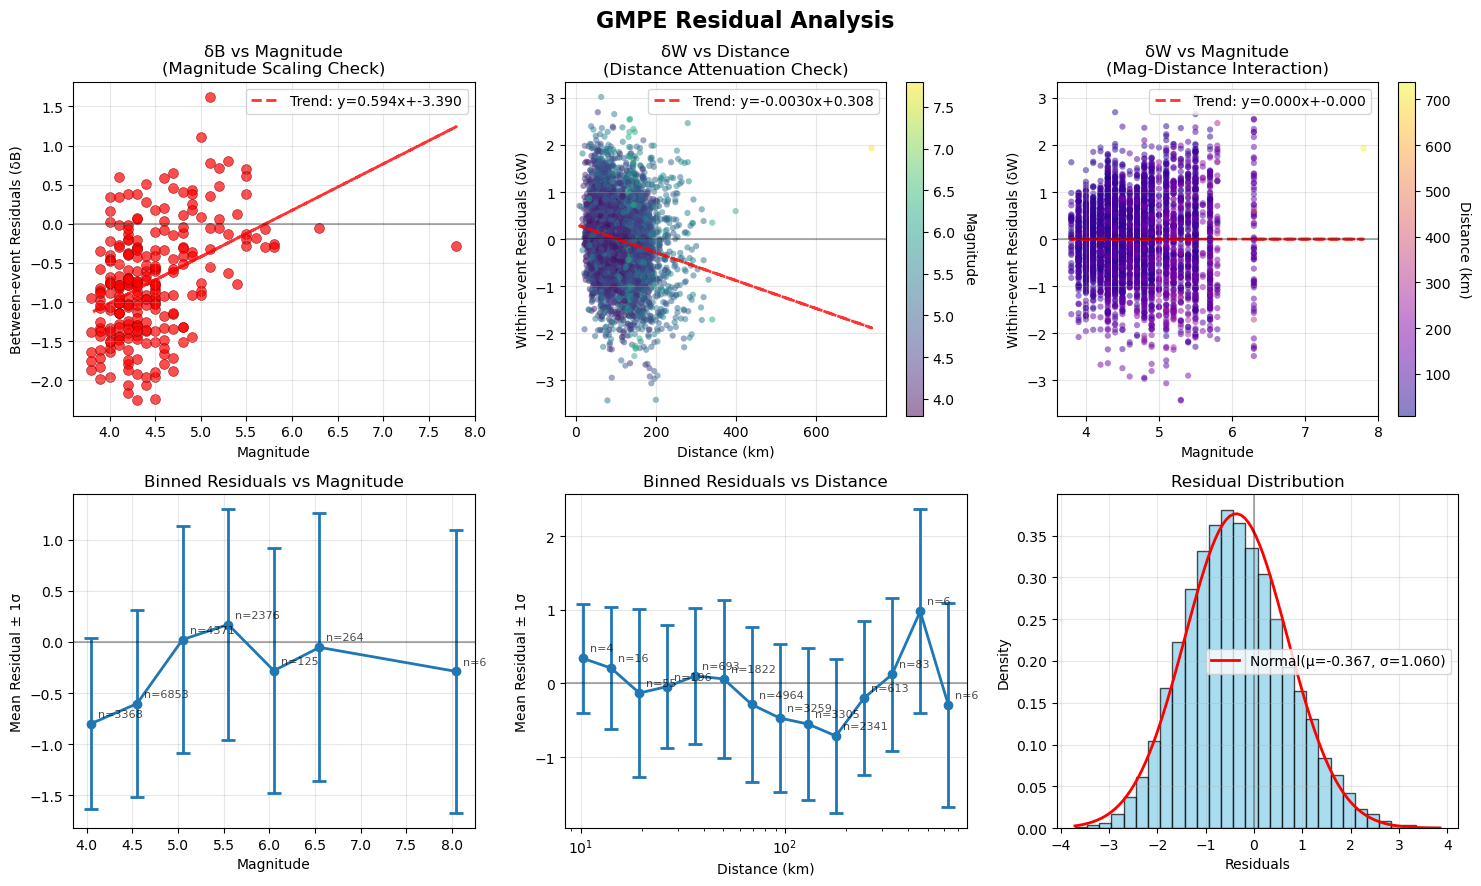

=== RESIDUAL ANALYSIS STATISTICS ===
Total records: 17363
Number of events: 246
Number of sites: 135

Overall Residuals:
  Mean: -0.3674
  Std:  1.0605

Between-event Residuals (δB):
  Mean: -0.7457
  Std (τ - between-event):  0.7043

Within-event Residuals (δW):
  Mean: 0.0000
  Std (φ - within-event):  0.8121

Between-site Residuals (δS2S):
  Mean: -0.0000
  Std (τ(S2S) - between-site):  0.4859

Standard Deviation Components:
  τ (between-event std): 0.7043
  φ (within-event std):  0.8121
  σ_total = √(τ² + φ²): 1.0750
  (Observed total std:   1.0605)
Standard Deviation Components:
  τ (between-event std): 0.7043
  φ (remaining within-event std):  0.6940
  τ(S2S) (between-site std): 0.4859
  σ_total = √(τ² + φ²+s2s^2): 1.1017

Correlations with δB (between-event):
  δB vs Magnitude: 0.4214

Correlations with δW (within-event):
  δW vs Distance:  -0.1937
  δW vs Magnitude: -0.0000


In [75]:
# analyse residual using 
# Load your data
import GMfunc.gmpe_residual_plots 
importlib.reload(GMfunc.gmpe_residual_plots)

from GMfunc.gmpe_residual_plots import plot_residual_analysis,print_residual_statistics

# print(df_combined.keys())

model = 'atk22_resd'
# model = 'bchydro_resd'

df_combined = pd.read_csv(model+'/' + 'resid_comb_m4-m65-'+arcflag +'.csv')

obs_df_all = pd.DataFrame({
    'event_id': df_combined['event_id'], 
    'site_id': df_combined['site_id'], 
    'magnitude': df_combined['magnitude'], 
    'distance': df_combined['distance_km'], 
    'residual': df_combined['resid']
})

# Your DataFrame should have columns:
# ['event_id', 'site_id', 'magnitude', 'distance', 'residual']

# Generate the plots
fig, axes = plot_residual_analysis(obs_df_all)
plt.show()

# Print detailed statistics
print_residual_statistics(obs_df_all)

In [ ]:
# analyse azimuthal anisotropy with bootstrapping

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
from tqdm import trange

# --- Assume df already exists with residuals, event IDs, station IDs, etc. ---
df = pd.DataFrame({
    "residual": [...],
    "event": [...],
    "station": [...],
    "R": [...],
    "theta": [...],  # radians
    "anisotropy": [...]  # optional
})


# Design matrix (fixed effects)
df["cos_theta"] = np.cos(df["theta"])
df["sin_theta"] = np.sin(df["theta"])
df["cos_2theta"] = np.cos(2 * df["theta"])
df["sin_2theta"] = np.sin(2 * df["theta"])
df["logR"] = np.log(df["R"] + 1.0)

exog = df[["logR", "cos_theta", "sin_theta", "cos_2theta", "sin_2theta"]]
exog = sm.add_constant(exog)

# Function to fit MixedLM and extract amplitudes
def fit_model(data):
    exog_local = data[["logR","cos_theta","sin_theta","cos_2theta","sin_2theta"]]
    exog_local = sm.add_constant(exog_local)
    model = MixedLM(data["residual"], exog_local, groups=data["event"],
                    vc_formula={"station": "0 + C(station)"})
    fit = model.fit(reml=False, method="lbfgs", disp=False)

    a1 = fit.params.get("cos_theta", 0.0)
    b1 = fit.params.get("sin_theta", 0.0)
    A1 = np.sqrt(a1**2 + b1**2)
    phi1 = np.degrees(np.arctan2(b1, a1))

    a2 = fit.params.get("cos_2theta", 0.0)
    b2 = fit.params.get("sin_2theta", 0.0)
    A2 = np.sqrt(a2**2 + b2**2)
    phi2 = np.degrees(np.arctan2(b2, a2))

    return A1, phi1, A2, phi2

# --- Fit to the original data
A1, phi1, A2, phi2 = fit_model(df)
print(f"Original: A1={A1:.3f}, phi1={phi1:.1f}°, A2={A2:.3f}, phi2={phi2:.1f}°")

# --- Bootstrap by resampling events
nboot = 500
boot_results = []

unique_events = df["event"].unique()

for _ in trange(nboot):
    sampled_events = np.random.choice(unique_events, size=len(unique_events), replace=True)
    boot_df = pd.concat([df[df["event"]==e] for e in sampled_events], ignore_index=True)
    try:
        boot_results.append(fit_model(boot_df))
    except Exception:
        continue  # skip failed fits

boot_results = np.array(boot_results)

# Compute bootstrap confidence intervals (2.5–97.5 percentile)
ci_A1 = np.percentile(boot_results[:,0], [2.5, 97.5])
ci_phi1 = np.percentile(boot_results[:,1], [2.5, 97.5])
ci_A2 = np.percentile(boot_results[:,2], [2.5, 97.5])
ci_phi2 = np.percentile(boot_results[:,3], [2.5, 97.5])

print(f"A1  = {A1:.3f}, 95% CI = {ci_A1}")
print(f"phi1= {phi1:.1f}°, 95% CI = {ci_phi1}")
print(f"A2  = {A2:.3f}, 95% CI = {ci_A2}")
print(f"phi2= {phi2:.1f}°, 95% CI = {ci_phi2}")


In [ ]:
1-1/0.8

-0.25

In [ ]:
100e6/0.63/9.8/2670


6066.275270586208

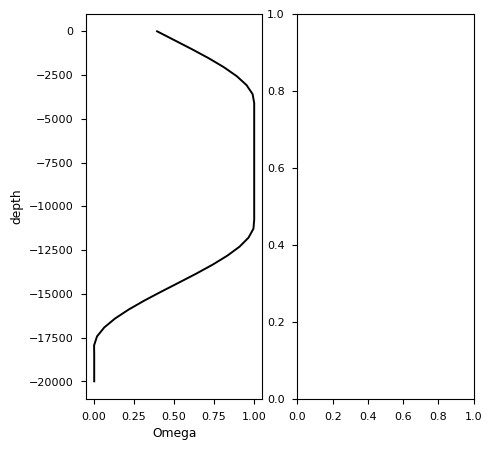

In [359]:

import DyPltFunc.input_para

importlib.reload(DyPltFunc.input_para)

from DyPltFunc.input_para import plt_omega_func

z1 ,z2,z3,z4= 3000,-4000,-11000,-18000

fig,axe= plt_omega_func(z1,z2,z3,z4,'kaim3')


In [362]:
1/(1+0.15)

0.8695652173913044